In [1]:
import matplotlib.pyplot as plt

import pickle

import binary_c
import xrb
from xrb.binary import binary_evolve
from xrb.src import stats
from xrb.SF_history import sf_history

from xrb.src.core import *
set_data_path("../../data")

import emcee
import acor

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
sampler = pickle.load( open( INDATA("SMC_MCMC_sampler_test.obj"), "rb" ) )

In [3]:
print sampler.chain.shape

for i in np.arange(5):
    
    acor_sample = np.zeros(10)
    for j in np.arange(10):
        acor_sample[j] = acor.acor(sampler.chain[i,:,j])[0]
    
    print acor_sample

(40, 500000, 10)
[  636.11717616  4153.38752334  1340.75433428   365.58002263  4171.95336442
  1552.21507945  2531.85118538  3838.79452371  6379.54007129  1581.95101456]
[ 2712.81025921  3005.72237783  2309.54378993  3242.9039991   1561.55968843
  2026.3014609   3071.51867231  2128.32379124  1252.62838687  4244.42372391]
[ 3919.18249414  5282.61587043  4335.27882937  4052.0838325   3763.94665788
   731.93530002  2236.11266848  6701.81053717  1011.80491687  2811.18604745]
[ 5228.5163367   4759.26130325  6515.50534626  1199.34990916  2270.06170521
  1786.48630874  3454.80491787  2467.9856749   1489.81584537  1447.51755707]
[ 9360.17756133  3032.61356161  1859.28104171  5377.82305136  1615.70035978
  3037.7633383   1332.78853172  2579.68846482  3282.11644738  3132.80308652]


In [44]:
print sampler.chain[1,:,0].shape

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.
(500000,)


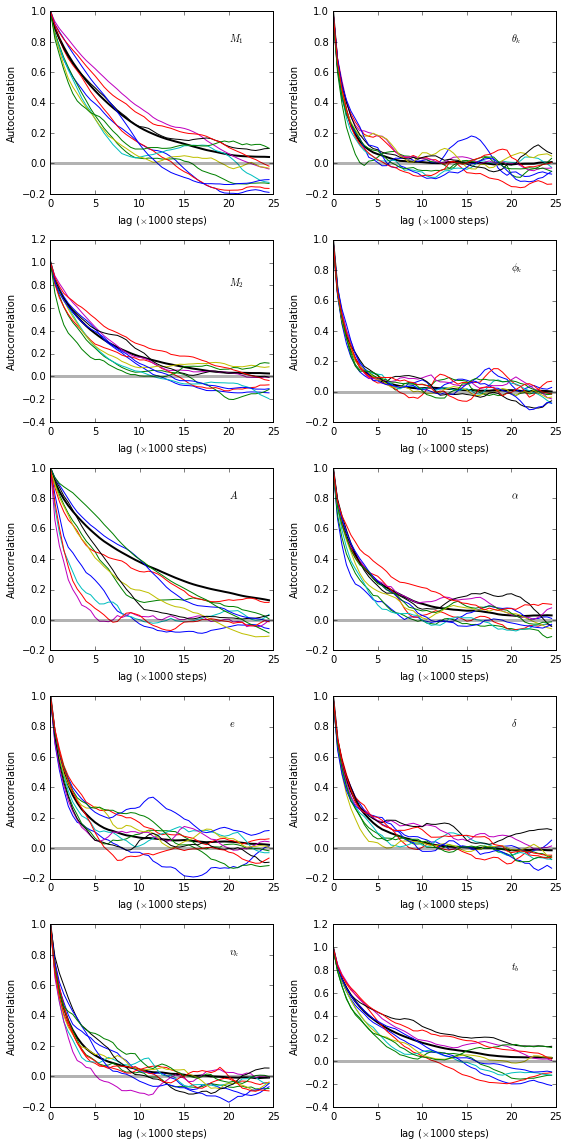

In [82]:
from pandas import Series

fig, ax = plt.subplots(5, 2, figsize=(8,16))

var = [r'$M_1$',r'$M_2$',r'$A$',r'$e$',r'$v_k$',r'$\theta_k$',r'$\phi_k$',r'$\alpha$',r'$\delta$',r'$t_b$']

N = 50

for k in np.arange(10):
    
    
    kx = k%5
    ky = k/5
    
    # Plot the autocorrelation of the flatchain
    autocorr = np.zeros(N)
    series = Series(data=sampler.flatchain.T[k])
    for i in np.arange(N):
        autocorr[i] = Series.autocorr(series, lag=500*i)

    ax[kx,ky].plot((500./1000.)*np.arange(N), autocorr, color='k', linewidth=2)

        
    # Plot the autocorrelation of 10 sample chains
    for j in np.arange(10):
        autocorr = np.zeros(N)
        series = Series(data=sampler.chain[j,:,k])

        for i in np.arange(N):
            autocorr[i] = Series.autocorr(series, lag=500*i)

        ax[kx,ky].plot((500./1000.)*np.arange(N), autocorr)

    
    ax[kx,ky].axhline(0.0, color='k', alpha=0.3, linewidth=3)
    ax[kx,ky].set_xlabel(r'lag ($\times$1000 steps)')
    ax[kx,ky].set_ylabel(r'Autocorrelation')
    ax[kx,ky].text(20, 0.8, var[k])
    
    
plt.tight_layout()

plt.savefig("../../figures/autocorrelation_test.pdf")
# plt.show()

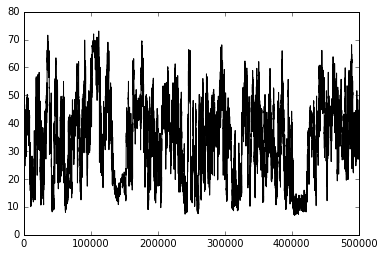

In [43]:
i, j = 10, 9

# for i in np.arange(1):
plt.plot(sampler.chain[i,:,j], color='k')
    
plt.show()

In [56]:
print sampler.acceptance_fraction

[ 0.04968  0.06264  0.05652  0.04664  0.04678  0.03872  0.0531   0.04614
  0.05254  0.0488   0.06266  0.05528  0.04916  0.04358  0.0649   0.03368
  0.03416  0.03328  0.05576  0.05688  0.04522  0.05456  0.03528  0.04324
  0.04344  0.0468   0.0245   0.05428  0.05122  0.04648  0.06982  0.04484
  0.06264  0.03406  0.01996  0.03814  0.05046  0.04688  0.0252   0.05584
  0.04812  0.0594   0.05324  0.03754  0.05898  0.04308  0.053    0.0346
  0.04424  0.03886  0.03038  0.01662  0.03362  0.03962  0.02738  0.04226
  0.05698  0.038    0.04306  0.0568   0.0641   0.04072  0.04408  0.05248
  0.03986  0.03156  0.04232  0.05348  0.0604   0.06908  0.02522  0.05702
  0.05944  0.04602  0.03686  0.05086  0.067    0.05612  0.05358  0.04478]


In [60]:
print emcee.autocorr.integrated_time(sampler.chain[0,:,0])

AutocorrError: The chain is too short to reliably estimate the autocorrelation time